In [204]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.tools.visualization import plot_histogram
import numpy as np
from enum import Enum

sim = AerSimulator()

NOISE_TYPE = Enum('NOISE_TYPE', ['bit_flip', 'depolarization', 'dephasing'])
NOISE_GATE_LOCATION = Enum('NOISE_GATE_LOCATION', ['before', 'after'])

In [217]:
# Define an entangled circuit
#     CX is a non-Abelian gate
#     CZ is an Abelian gate because it is a symmetric matrix
def create_circuit(etype = None):
    qc = QuantumCircuit(2, 2)
    
    match etype:
        case NOISE_TYPE.bit_flip:
            print('BIT FLIP NOISE')
            # 50% chance of noise
            is_noisey_0 = np.random.randint(0, 2)
            if(is_noisey_0 == 1):
                gate_location = NOISE_GATE_LOCATION.before if np.random.randint(0, 2) == 0 \
                    else NOISE_GATE_LOCATION.after
                print(gate_location)
                if(gate_location == NOISE_GATE_LOCATION.before):
                    qc.x(0)
                    qc.h(0)
                else:
                    qc.h(0)
                    qc.x(0)
            else:
                qc.x(0)
            is_noisey_1 = np.random.randint(0, 2)
            if(is_noisey_1 == 1):
                gate_location = NOISE_GATE_LOCATION.before if np.random.randint(0, 2) == 0 \
                    else NOISE_GATE_LOCATION.after
                if(gate_location == NOISE_GATE_LOCATION.before):
                    qc.x(1)
                    qc.cnot(0, 1)
                else:
                    qc.cnot(0, 1)
                    qc.x(1)
            else:
                qc.cnot(0, 1)
            if(is_noisey_0 == 0 and is_noisey_1 == 0):
                return create_circuit()
        case NOISE_TYPE.depolarization:
            print('DEPOLARIZATION NOISE')
        case NOISE_TYPE.dephasing:
            print('DEPHASING NOISE')
        case _:
            print('NO NOISE')
            qc.h(0)
            qc.cnot(0, 1)
        
    qc.measure([0, 1], [0, 1])

    return qc

In [218]:
def simulate_measurements(circuit, trials = 1000, shots_per_trial = 10):
    circ = transpile(circuit, sim)
    result = sim.run(circ).result()
    counts = result.get_counts(0)
    return counts

NO NOISE
     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 


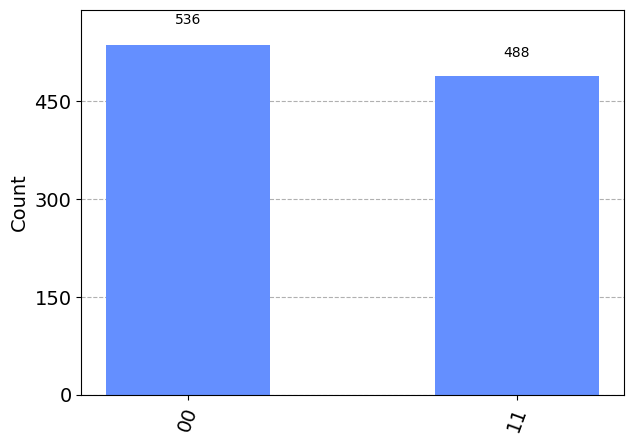

In [219]:
# Simulate a noiseless circuit
ideal_circuit = create_circuit()
print(ideal_circuit)

measurements = simulate_measurements(ideal_circuit)
plot_histogram(measurements)

BIT FLIP NOISE
NO NOISE
     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 
{'11': 525, '00': 499}


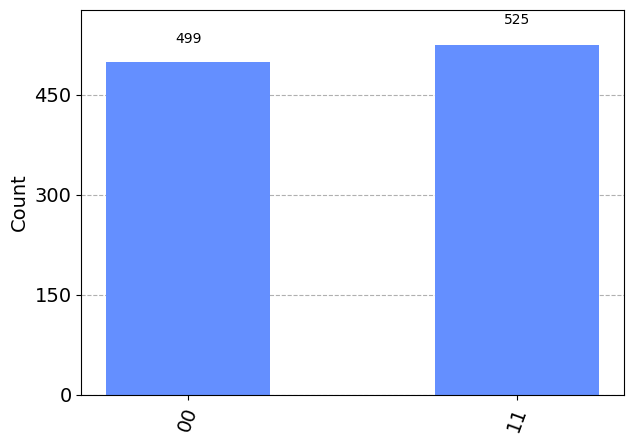

In [226]:
# Simulate bit-flip noise
bit_flip_noise_circuit = create_circuit(NOISE_TYPE.bit_flip)
print(bit_flip_noise_circuit)

measurements = simulate_measurements(bit_flip_noise_circuit)
print(measurements)
plot_histogram(measurements)

In [238]:
x = {'11': 525, '00': 499}
y = {'11': 525, '00': 493}
print(x.update(y))
#print(x.items()['11'])
z = dict(list(x.items()) + list(y.items()))
print(z)
print(list(x.items())[0])

None
{'11': 525, '00': 493}
('11', 525)
